# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from joblib import dump, load

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Exploring the dataset

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df.rename(columns={'Annual Income (k$)' : 'Annual Income in K'},inplace=True)   

In [11]:
df

,CustomerID,Gender,Age,Annual Income in K,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Visualization

#### pairwise relationships between features

<Figure size 1600x1000 with 0 Axes>

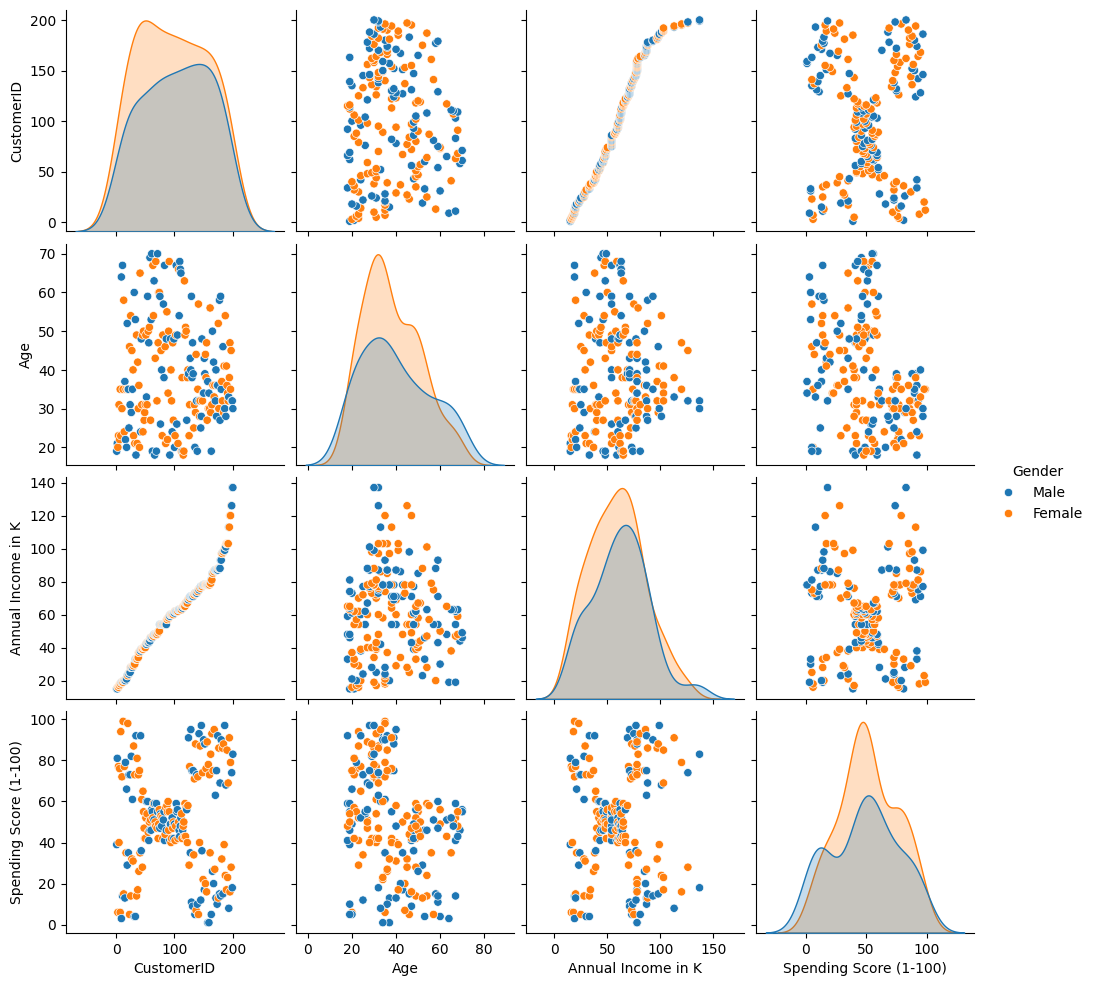

In [12]:
plt.figure(figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

#### male vs female

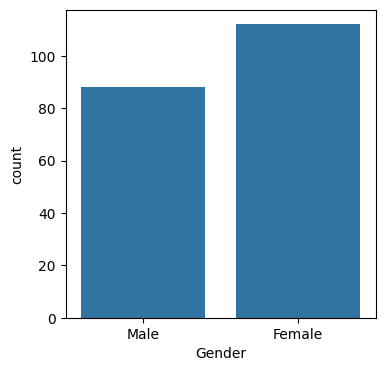

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='Gender')
plt.show()

#### Distribution of numerical features

C:\Users\gaura\AppData\Local\Temp\ipykernel_9996\904386580.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins=10)
C:\Users\gaura\AppData\Local\Temp\ipykernel_9996\904386580.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins=10)
C:\Users\gaura\AppData\Local\Temp\ipyker

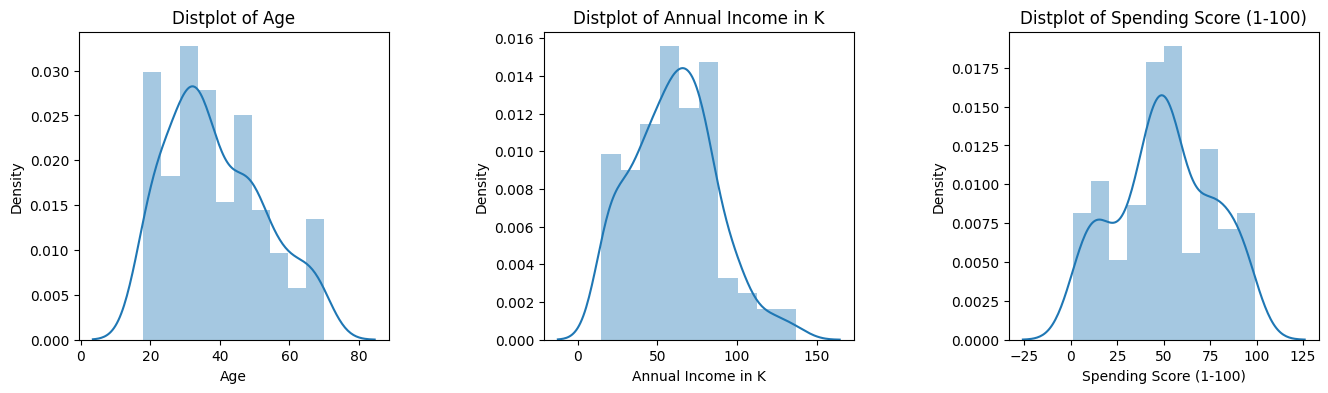

In [14]:
plt.figure(figsize=(16,4))
n = 0 
for x in ['Age', 'Annual Income in K', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

# K Means Clustering

In [15]:
X = df.iloc[:, -3:]
X.head()                             

,Age,Annual Income in K,Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [16]:
km_inertias, km_scores = [], []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    print(f'{i} clusters: {kmeans.inertia_}')
    km_inertias.append(kmeans.inertia_)
    km_scores.append(silhouette_score(X, kmeans.labels_))

2 clusters: 212840.1698209719
3 clusters: 143342.751571706
4 clusters: 105251.10813220503
5 clusters: 82608.63809385584
6 clusters: 58338.70237980935
7 clusters: 52496.58948832718
8 clusters: 44342.3173934174
9 clusters: 40623.36547212477
10 clusters: 37153.67212762972


In [17]:
px.line(y=km_inertias,x=range(2,11),title='inertia depending on k')

In [18]:
px.line(y=km_scores,x=range(2,11),title='scores depending on k')

In [19]:
kmeans = KMeans(n_clusters=5,random_state=0).fit(X)
df['group'] = kmeans.predict(X)

In [20]:
df

,CustomerID,Gender,Age,Annual Income in K,Spending Score (1-100),group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [21]:
px.scatter_3d(df,x='Age',y='Annual Income in K',z='Spending Score (1-100)',color='group',symbol='group')

In [22]:
df.group.value_counts()

group
4    53
0    50
1    39
3    34
2    24
Name: count, dtype: int64

In [23]:
for i in range(5):
    print(f'cluster nb : {i}')
    print(df[df.group == i].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
       CustomerID    Age  Annual Income in K  Spending Score (1-100)
count       50.00  50.00               50.00                   50.00
mean        52.88  54.06               40.46                   36.72
min          3.00  20.00               16.00                    3.00
max        117.00  70.00               65.00                   60.00



cluster nb : 1
       CustomerID        Age  Annual Income in K  Spending Score (1-100)
count        39.0  39.000000           39.000000               39.000000
mean        162.0  32.692308           86.538462               82.128205
min         124.0  27.000000           69.000000               63.000000
max         200.0  40.000000          137.000000               97.000000



cluster nb : 2
       CustomerID    Age  Annual Income in K  Spending Score (1-100)
count   24.000000  24.00           24.000000               24.000000
mean    23.041667  25.25           25.833333               76.916667
min      1.000000  18.00        

# Saving model

In [24]:
dump(kmeans,'static\model.pk')

<>:1: SyntaxWarning:

invalid escape sequence '\m'

<>:1: SyntaxWarning:

invalid escape sequence '\m'

C:\Users\gaura\AppData\Local\Temp\ipykernel_9996\3272865587.py:1: SyntaxWarning:

invalid escape sequence '\m'



['static\\model.pk']

In [25]:
load_model = load('static\model.pk')

<>:1: SyntaxWarning:

invalid escape sequence '\m'

<>:1: SyntaxWarning:

invalid escape sequence '\m'

C:\Users\gaura\AppData\Local\Temp\ipykernel_9996\470697447.py:1: SyntaxWarning:

invalid escape sequence '\m'



In [26]:
x=np.array([20,112,50]).reshape(1,-1)

In [27]:
p=load_model.predict(x)[0]
p

C:\Users\gaura\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



1

In [28]:
X

,Age,Annual Income in K,Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [29]:
predict = load_model.predict(X)[198]
predict

3

In [36]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income in K',
       'Spending Score (1-100)', 'group'],
      dtype='object')

In [37]:
df.to_csv('WorkData.csv',index=False)

In [35]:
#find number of customers in each cluster using pred
if predict==0:
    print('cluster 0')
    print(df[df.group == 0].shape[0])
elif predict==1:
    print('cluster 1')
    print(df[df.group == 1].shape[0])
elif predict==2:
    print('cluster 2')
    print(df[df.group == 2].shape[0])
elif predict==3:
    print('cluster 3')
    print(df[df.group == 3].shape[0])
elif predict==4:
    print('cluster 4')
    print(df[df.group == 4].shape[0])
df.group.value_counts()



cluster 3
34


group
4    53
0    50
1    39
3    34
2    24
Name: count, dtype: int64

## Groups

* Cluster 0 :
  - Age : 54, older
  - medium annual income
  - medium annual spend
* Cluster 1 :
  - Age : 32, young
  - high annual income
  - high annual spend
* Cluster 2 :
  - Age : 43, older
  - medium annual income
  - medium annual spend
* Cluster 3 :
  - Age : 40, middle
  - high annual income
  - low annual spend
* Cluster 4 :
  - Age : 25, young
  - low annual income
  - high annual spend